# Data Driven Customer Product Analysis:

A fitness hub is interested in understanding the types of digital products that can be offered. The plan is to conduct a market analysis to understand how to place digital fitness products in the market. A market analysis can identify strengths of the competitors, create unique digital products and services for potential users.

In [19]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white', palette='Pastel2')
import os

def read_file(filepath, plot = True):
    """
    Read a CSV file from a given filepath, convert it into a pandas DataFrame,
    and return a processed DataFrame with three columns: 'week', 'region', and 'interest'. Generate a line plot using Seaborn to visualize the data. This corresponds to the first graphic (time series) returned by trends.google.com.
    """
    file = pd.read_csv(filepath, header=1)
    df = file.set_index('Week').stack().reset_index()
    df.columns = ['week','region','interest']
    df['week'] = pd.to_datetime(df['week'])
    plt.figure(figsize=(8,3))
    df = df[df['interest']!="<1"]
    df['interest'] = df['interest'].astype(float)

    if plot:
        sns.lineplot(data = df, x= 'week', y= 'interest',hue='region')
    return df

def read_geo(filepath, multi=False):
    """
    Read a CSV file from a given filepath, convert it into a pandas DataFrame,
    and return a processed DataFrame with two columns: 'country' and 'interest'. Generate a bar plot using Seaborn to visualize the data. This corresponds to the second graphic returned by trends.google.com. Use multi=False if only one keyword is being analyzed, and multi=True if more than one keyword is being analyzed.
    """
    file = pd.read_csv(filepath, header=1)

    if not multi:
        file.columns = ['country', 'interest']
        plt.figure(figsize=(8,4))
        sns.barplot(data = file.dropna().iloc[:25,:], y = 'country', x='interest')

    if multi:
        plt.figure(figsize=(8,8))
        file = file.set_index('Country').stack().reset_index()
        file.columns = ['country','category','interest']
        file['interest'] = pd.to_numeric(file['interest'].apply(lambda x: x[:-1]))
        sns.barplot(data=file.dropna(), y = 'country', x='interest', hue='category')

    file = file.sort_values(ascending=False,by='interest')
    return file

Breaking down the code:

1. Creates a function called 'read_file'

- Reads a CSV file from a given filepath.
- Converts it into a pandas DataFrame.
- Processes the DataFrame to have three columns: 'week', 'region', and 'interest'.
- Generates a line plot using Seaborn to visualize the data.

2. df = file.set_index('Week').stack().reset_index()

(a). `file.set_index('Week')`: This operation sets the index of the DataFrame `file` to the values in the column named `'Week'`. This means that the values in the `'Week'` column become the index (row labels) of the DataFrame. This operation returns a new DataFrame with the specified index.

(b). `.stack()`: After setting the index, this operation stacks the DataFrame. Stacking a DataFrame means moving the innermost level of column labels to the innermost level of row labels. This typically results in a DataFrame with a MultiIndex (hierarchical index) on the rows.

(c). `.reset_index()`: Finally, this operation resets the index of the DataFrame back to the default integer index. It moves the index labels back into a regular column and assigns a default integer index starting from 0. This operation returns a new DataFrame with the reset index.

`stack()`: This function is used to pivot the columns of the DataFrame into the index, producing a Series with a hierarchical index. In other words, it "stacks" the level of column labels to produce a new level of index labels.

Overall, the code takes the DataFrame `file`, sets its index to the column named `'Week'`, then stacks the columns into the index to produce a Series, and finally resets the index, turning the index labels back into a regular column while assigning a default integer index.

3. `df = df[df['interest']!="<1"]`: This line filters the DataFrame `df` to include only rows where the value in the `'interest'` column is not `"<1"`. This is achieved by using boolean indexing. It selects rows where the condition `df['interest']!="<1"` evaluates to `True` and excludes rows where it evaluates to `False`. This operation effectively removes rows where the interest level is less than 1.

4. Creates another function called 'read_geo':

- Reads a CSV file from a given filepath.
- Converts it into a pandas DataFrame.
- Processes the DataFrame to have two columns: 'country' and 'interest'.
- Generates a bar plot using Seaborn to visualize the data.

5. multi = True and Multi  = False:

`multi` is a boolean parameter that controls how the data should be processed and visualized based on whether multiple keywords are being analyzed (`multi=True`) or not (`multi=False`).

(a). `multi=True`: When `multi` is set to `True`, it indicates that the data corresponds to the analysis of multiple keywords. In this case, the function processes the data accordingly. Specifically:
   - It expects the CSV file to have a structure where each row represents data for a specific country and category across multiple keywords.
   - It visualizes the data using Seaborn to show the distribution of interest across different categories for each country. This typically involves stacking the DataFrame to incorporate categories as a new dimension in the plot (hence the use of `hue='category'` in the `sns.barplot()` function).
   - The figure size for the plot might be adjusted to accommodate the visual representation of multiple keywords.

(b). `multi=False`: Conversely, when `multi` is set to `False`, it indicates that the data corresponds to the analysis of a single keyword. In this case, the function expects a different structure of the data and visualizes it differently:
   - It assumes that each row in the CSV file represents data for a specific country with a single interest value.
   - It visualizes the data using Seaborn to display the top countries with the highest interest in the keyword. Typically, this involves a simple bar plot where each bar represents the interest level for a specific country.
   - The figure size might be adjusted differently to accommodate the visual representation of a single keyword.

In summary, the `multi` parameter allows the function to adapt its processing and visualization steps based on whether the data corresponds to the analysis of a single keyword (`multi=False`) or multiple keywords (`multi=True`). This flexibility enables the function to handle different scenarios and provide appropriate visualizations accordingly.

6. file['interest'] = pd.to_numeric(file['interest'].apply(lambda x: x[:-1]))

file['interest'] = pd.to_numeric(file['interest'].apply(lambda x: x[:-1])): This line converts the values in the 'interest' column of the DataFrame file to numeric values. It removes the last character from each value (assuming it's a percentage sign) and then converts the result to numeric

## 1. Load data on global interest in fitness

,week,region,interest
0,2018-03-18,workout: (Worldwide),59.0
1,2018-03-25,workout: (Worldwide),58.0
2,2018-04-01,workout: (Worldwide),61.0
3,2018-04-08,workout: (Worldwide),57.0
4,2018-04-15,workout: (Worldwide),59.0


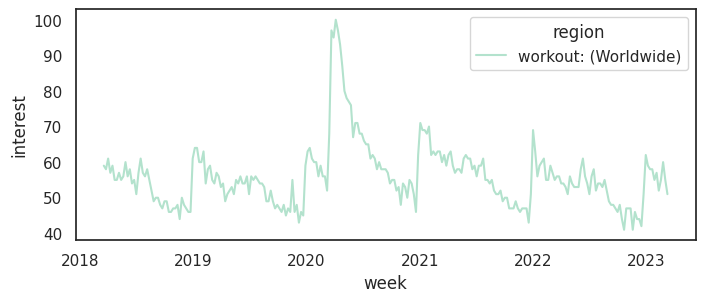

In [21]:
workout = read_file('/content/drive/MyDrive/Pythoncsv/workout.csv')
workout.head()

### Overall Trends

- The graph shows that interest in working out has been steadily increasing since 2018, with a slight decline in 2020. This suggests that the fitness industry is a growing market with potential for businesses.

- The reasons for this increase in interest are likely to be complex and multifaceted, but could include a growing awareness of the health benefits of exercise, a rise in disposable income, and the increasing popularity of social media fitness influencers.



## 2. Assess global interest in fitness
### In which month demand for fitness is highest across the world, on average

In [22]:
# Group the work data by month and calculate the average interest
workout_by_month = workout.groupby(workout['week'].dt.to_period('M')).mean()

# Find the month with the highest average interest
highest_month = workout_by_month[workout_by_month['interest']==workout_by_month['interest'].max()]

# Convert the highest month's index to string
highest_month_str = str(highest_month.index[0].to_timestamp().date())

<ipython-input-22-5fd1a17db78e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  workout_by_month = workout.groupby(workout['week'].dt.to_period('M')).mean()


In [23]:
workout_by_month

,interest
week,
2018-03,58.50
2018-04,57.40
2018-05,57.00
2018-06,55.75
2018-07,56.40
...,...
2022-11,45.25
2022-12,45.25
2023-01,58.40


In [24]:
highest_month

,interest
week,
2020-04,94.25


In [25]:
highest_month_str

'2020-04-01'

## 3. Segmenting the global interest




,week,region,interest
0,2018-03-18,home workout: (Worldwide),12.0
1,2018-03-18,gym workout: (Worldwide),16.0
2,2018-03-18,home gym: (Worldwide),10.0
3,2018-03-25,home workout: (Worldwide),13.0
4,2018-03-25,gym workout: (Worldwide),17.0


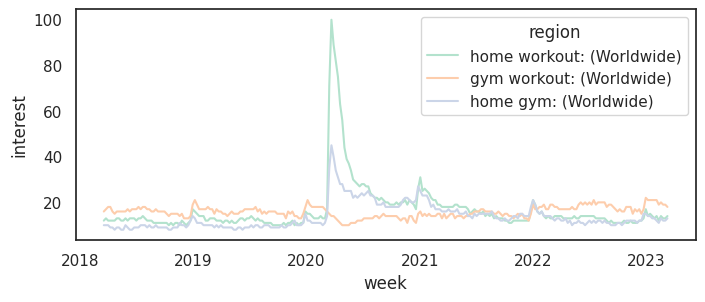

In [26]:
# 3. Compare interest in home workouts, gym workouts and home gyms
workout = read_file('/content/drive/MyDrive/Pythoncsv/three_keywords.csv') # This will create a lineplot
workout.head()


- From the plot it is clear that one **(Gym workout)**  of the three categories has clearly generated more interest than the other two categories over the entirety of 2022, as lockdowns have elapsed.

- Demand in **home workout** during peak COVID was one of the three categories clearly generated more interest than the other two during 2020 lockdowns globally.



## 4. Finding the top 25 countries with the highest interest in workouts.

,country,interest
5,United States,100.0
12,Canada,86.0
18,Australia,77.0
22,New Zealand,73.0
23,Lebanon,73.0


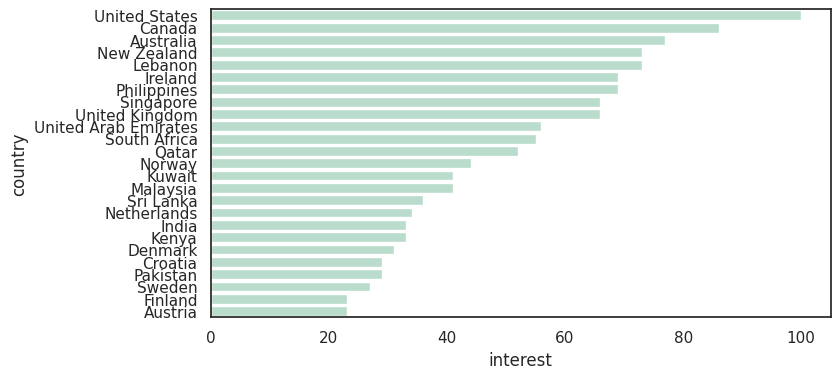

In [27]:
workout_global = read_geo('/content/drive/MyDrive/Pythoncsv/workout_global.csv')
top_25_countries = workout_global.head(25)
top_country = top_25_countries['country'].iloc[0]
workout_global.head()

## 5. Assessing regional demand for home workouts, gym workouts and home gyms

We found in the previous step that the other countries such as, "Philippines", "Singapore", the "United Arab Emirates", "Qatar", "Kuwait", "Lebanon," "Malaysia", "Sri Lanka", "India", and "Pakistan", rank amongst the top 25 countries with the highest interest in workouts. We will now disaggregate the keywords you used earlier: "home workout," "gym workout," and "home gym" by these countries.

                 country                           category  interest
9            Philippines  home workout: (3/16/18 - 3/16/23)        52
19                 India   gym workout: (3/16/18 - 3/16/23)        50
42              Malaysia  home workout: (3/16/18 - 3/16/23)        47
28  United Arab Emirates   gym workout: (3/16/18 - 3/16/23)        47
40              Pakistan   gym workout: (3/16/18 - 3/16/23)        46
31             Sri Lanka   gym workout: (3/16/18 - 3/16/23)        43
34             Singapore   gym workout: (3/16/18 - 3/16/23)        39
10           Philippines   gym workout: (3/16/18 - 3/16/23)        38
43              Malaysia   gym workout: (3/16/18 - 3/16/23)        38
33             Singapore  home workout: (3/16/18 - 3/16/23)        37


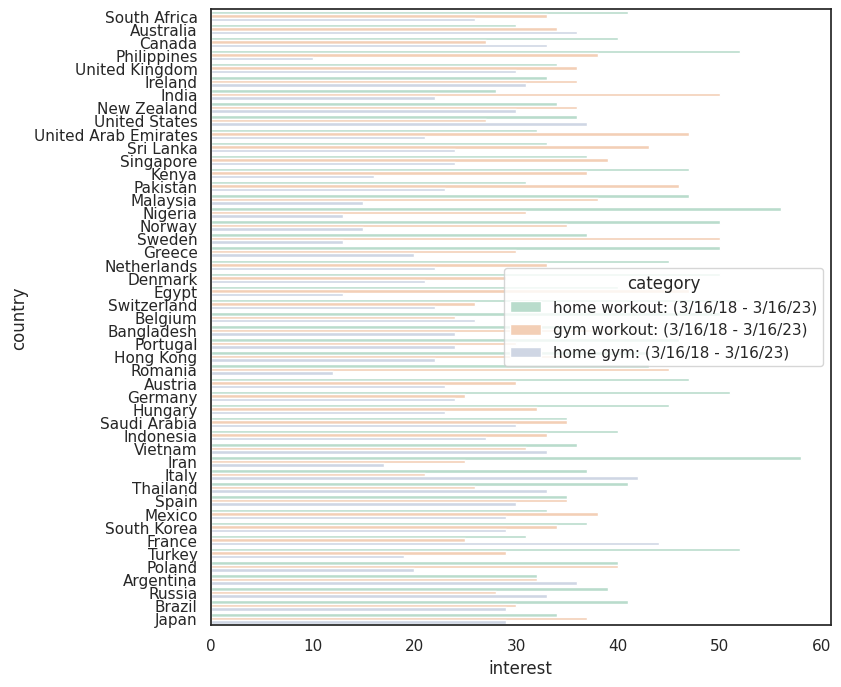

In [33]:
geo_categories = read_geo('/content/drive/MyDrive/Pythoncsv/geo_three_keywords.csv', multi=True)
MESA_countries = ["Philippines", "Singapore", "United Arab Emirates", "Qatar", "Kuwait", "Malaysia", "Sri Lanka", "India", "Pakistan", "Lebanon"]
MESA = geo_categories.loc[geo_categories.country.isin(MESA_countries), :]
print(MESA.head(10))

## 6. Assessing the split of interest by country and category

In [46]:
MESA.set_index(['country','category']).unstack()
top_home_workout_country = 'Philippines'
top_home_workout_country

'Philippines'

Here, we see that the highest interest country is **Philippines**. Let's dig more into it.

In [47]:
highest_interest_country = MESA[MESA["country"]=="Philippines"]
highest_interest_country

,country,category,interest
9,Philippines,home workout: (3/16/18 - 3/16/23),52
10,Philippines,gym workout: (3/16/18 - 3/16/23),38
11,Philippines,home gym: (3/16/18 - 3/16/23),10


The country **Philippines** has the highest interest in home workouts, but we can see in the data that this country has a very low interest in home gyms.

## 7. A deeper dive into Philippines

Deciding to look at YouTube keyword searches, "yoga," "workout," "zumba," "weight training," and "weight loss," which the business has expertise. We see that in **Philippines** two types of content dominate in addition to YouTube searches for "workout".

,week,region,interest
0,2018-03-18,yoga: (Philippines),6.0
1,2018-03-18,workout: (Philippines),30.0
2,2018-03-18,zumba: (Philippines),39.0
3,2018-03-18,bodybuilding: (Philippines),1.0
4,2018-03-18,weight loss: (Philippines),3.0
...,...,...,...
1299,2023-03-05,weight loss: (Philippines),3.0
1300,2023-03-12,yoga: (Philippines),4.0
1301,2023-03-12,workout: (Philippines),32.0
1302,2023-03-12,zumba: (Philippines),44.0


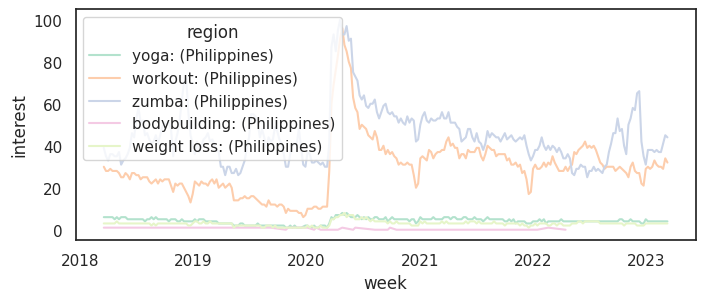

In [48]:
read_file('/content/drive/MyDrive/Pythoncsv/yoga_zumba_phl.csv')